# Regressão Linear Simples

In [1]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [11]:
base_plano_saude = pd.read_csv('../../plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


### Divisão entre Previsores e Classe

In [12]:
x_plano_saude = base_plano_saude.iloc[:, 0].values
x_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [13]:
y_plano_saude = base_plano_saude.iloc[:, 1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090],
      dtype=int64)

### Mede como duas variáveis estão linearmente relacionadas

In [14]:
np.corrcoef(x_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

### reshape é um método do NumPy usado para mudar a forma (shape) de um array sem alterar seus dados.

In [15]:
x_plano_saude = x_plano_saude.reshape(-1, 1)
x_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

# Escalonamento

In [16]:
from sklearn.linear_model import LinearRegression

regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x_plano_saude, y_plano_saude)

LinearRegression()

In [17]:
# b0
regressor_plano_saude.intercept_

-558.9490909090912

In [19]:
# b1
regressor_plano_saude.coef_

array([61.86787879])

# Previsões

In [20]:
previsoes = regressor_plano_saude.predict(x_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [22]:
x_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [30]:
grafico = px.scatter(x = x_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = x_plano_saude.ravel(), y = previsoes, name = 'Regressão')
grafico.show()

### Score

In [27]:
regressor_plano_saude.score(x_plano_saude, y_plano_saude)

0.8666112727879174

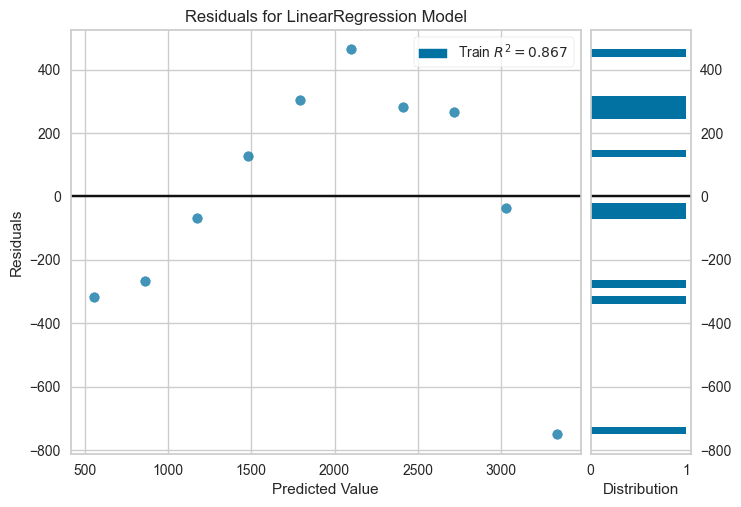

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [29]:
from yellowbrick.regressor import ResidualsPlot

visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(x_plano_saude, y_plano_saude)
visualizador.poof()